이상탐지 모델

# 통계적 기법

In [ ]:
# 삼성전자 데이터

## 라이브러리

In [ ]:
# yfinance 라이브러리를 이용해 삼성전자 주가 데이터를 가져옵니다. Close 열만 사용하며, 결측치를 제거합니다.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

## 스타일 설정

In [ ]:
# Seaborn 라이브러리를 사용해 그래프의 스타일을 "whitegrid"로 설정하는 명령입니다. 이 명령은 그래프의 배경을 하얀색으로 설정하고, 격자(grid)를 추가하여 데이터를 더욱 시각적으로 명확하게 표현합니다. 특히 시계열 데이터와 같이 선형 그래프를 그릴 때, 값의 변화를 쉽게 파악할 수 있도록 돕습니다.

# 코드 설명
# sns: Seaborn 라이브러리를 sns로 줄여서 사용하는 약어입니다.
# set() 함수: Seaborn의 전체 스타일을 설정하는 함수로, 이 함수에 style 매개변수를 지정하여 다양한 스타일을 적용할 수 있습니다.
# style="whitegrid": 스타일 중 whitegrid를 선택하여, 흰색 배경과 격자선을 추가합니다.
# 기타 Seaborn 스타일 옵션
# "darkgrid": 어두운 배경에 격자가 포함된 스타일
# "white": 흰색 배경만 적용된 스타일 (격자 없음)
# "dark": 어두운 배경만 적용된 스타일 (격자 없음)
# "ticks": 흰색 배경에 축 틱 마크(tick mark)를 강조하는 스타일

In [ ]:
# 스타일 설정
sns.set(style="whitegrid")

## 데이터 수집

In [ ]:
# 1. 데이터 수집
ticker = '005930.KS'  # 삼성전자 티커
data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
data = data[['Close']].dropna()


[*********************100%***********************]  1 of 1 completed


## 데이터 전처리

In [ ]:
# 20일과 50일의 이동 평균을 추가하여, 주가의 단기 및 장기 변동을 확인할 수 있도록 합니다.
# 이동 평균을 사용하면 주가가 정상 범위에서 벗어나는 시점을 더 쉽게 확인할 수 있습니다.

In [ ]:
# 데이터 전처리 - 이동 평균 계산
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20일 이동 평균
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50일 이동 평균

## 이상탐지모델

In [ ]:
# Isolation Forest 이상 탐지:
# IsolationForest 모델을 사용하여 이상치를 탐지합니다.
# contamination=0.01로 설정하여, 약 1%의 데이터 포인트를 이상치로 간주합니다.

# 모델 예측 결과로 이상치(-1)와 정상치(1)가 할당됩니다.

In [ ]:
# 3. 이상 탐지 모델 적용 - Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
data['Anomaly'] = model.fit_predict(data[['Close']])

# 이상치 분리
anomalies = data[data['Anomaly'] == -1]

## 시각화

In [ ]:
# 시각화
# plt.figure(): Matplotlib의 figure 함수를 사용하여 새로운 그림 영역(Figure)을 생성합니다.
#     이 영역 안에 여러 개의 그래프나 축을 추가할 수 있습니다.
# figsize=(14, 8): figsize 매개변수를 사용해 그림 영역의 가로 세로 크기를 지정합니다.
#     여기서 figsize=(14, 8)은 그림의 가로 크기를 14인치, 세로 크기를 8인치로 설정합니다.

# 원본데이터와 이동평균
# Close 가격을 파란색 선으로, 이동 평균(20일, 50일)을 각각 녹색과 주황색 점선으로 표시합니다.
# 이상치는 빨간색 점으로 시각화하여 주가 패턴에서 정상 범위를 벗어난 시점을 확인할 수 있습니다.

# # 이상치 시각화
# anomalies.index: x축 좌표로 이상치가 발생한 시점(날짜)을 설정합니다.
# anomalies 데이터프레임의 인덱스를 사용하여 이상치가 발생한 날짜를 가져옵니다.
# anomalies['Close']: y축 좌표로 이상치로 탐지된 Close 가격을 설정합니다.
# color='red': 점의 색상을 빨간색으로 설정하여 이상치를 시각적으로 강조합니다.
# label='Anomalies': 범례에 사용할 이름을 설정하여, 그래프에서 'Anomalies'라는 이름으로 설명이 표시되도록 합니다.
# marker='o': 데이터 포인트의 모양을 원형('o')으로 설정합니다.
# s=60: 각 점의 크기를 60으로 설정하여, 일반적인 데이터 포인트보다 더 크고 눈에 띄게 표시합니다.

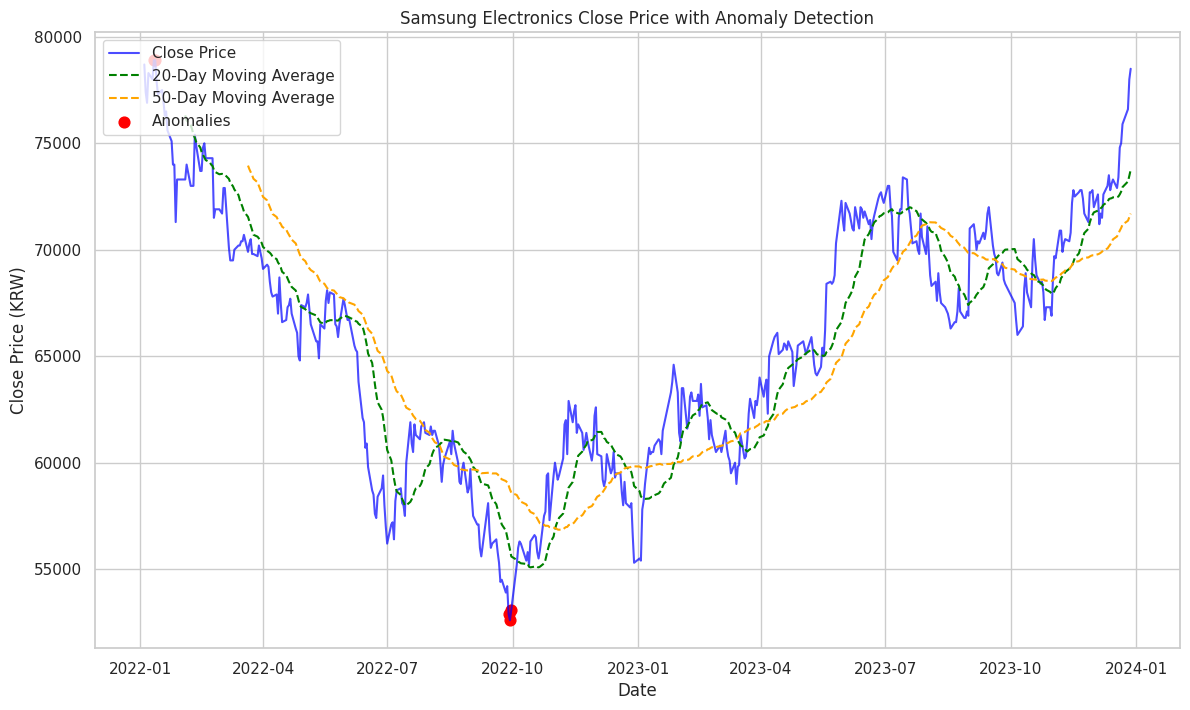

In [ ]:
# 시각화
plt.figure(figsize=(14, 8))

# 원본 데이터와 이동 평균
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(data.index, data['MA20'], label='20-Day Moving Average', color='green', linestyle='--')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average', color='orange', linestyle='--')

# 이상치 시각화
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies', marker='o', s=60)

# 차트 구성
plt.title("Samsung Electronics Close Price with Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Close Price (KRW)")
plt.legend(loc='upper left')
plt.show()


In [ ]:
# 코드 종합

[*********************100%***********************]  1 of 1 completed


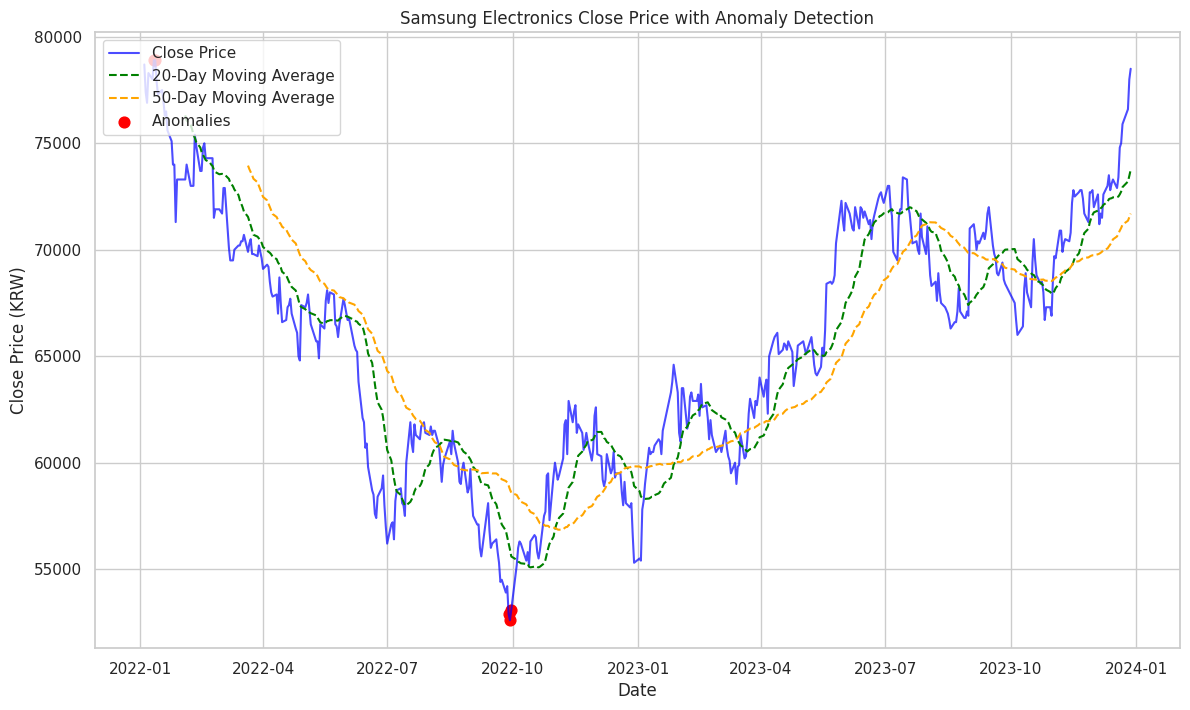

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# 1. 데이터 수집
ticker = '005930.KS'  # 삼성전자 티커
data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# 2. 데이터 전처리 - 이동 평균 계산
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20일 이동 평균
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50일 이동 평균

# 3. 이상 탐지 모델 적용 - Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
data['Anomaly'] = model.fit_predict(data[['Close']])

# 이상치 분리
anomalies = data[data['Anomaly'] == -1]

# 4. 시각화
plt.figure(figsize=(14, 8))

# 원본 데이터와 이동 평균
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(data.index, data['MA20'], label='20-Day Moving Average', color='green', linestyle='--')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average', color='orange', linestyle='--')

# 이상치 시각화
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies', marker='o', s=60)

# 차트 구성
plt.title("Samsung Electronics Close Price with Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Close Price (KRW)")
plt.legend(loc='upper left')
plt.show()


In [ ]:
pip install --upgrade yfinance==0.1.67
pip install pandas==1.5.3  # 또는 버전을 낮추어 설치


# LSTM 이용

In [ ]:
# 데이터 수집 및 전처리
# yfinance를 사용해 삼성전자 주가 데이터를 가져오고, MinMaxScaler로 데이터를 0과 1 사이로 스케일링합니다.
# 60일 간의 데이터를 이용해 예측하도록 데이터를 준비합니다.
# LSTM 모델 정의 및 학습:

# 두 개의 LSTM 레이어와 출력 레이어를 포함한 신경망을 구성합니다.
# epochs=10과 batch_size=32로 설정해 모델을 학습시킵니다.

# 예측 및 역변환:
# 학습한 LSTM 모델로 예측값을 생성한 후, 스케일을 원래 값으로 역변환하여 실제값과 비교합니다.

# 이상 탐지:
# 예측값과 실제값 간의 상대적 오차가 특정 임계값(예: 5%) 이상인 시점을 이상치로 간주합니다.
# 시각화:

# 실제 주가, 예측 주가를 시각화하고, 이상치는 빨간색으로 표시하여 시계열 데이터를 기준으로 비정상적인 변동이 발생한 시점을 확인합니다.

## 라이브러리

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## 데이터 수집 및 전처리

In [ ]:
# 1. 데이터 수집 및 전처리
ticker = '005930.KS'  # 삼성전자 티커
data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

[*********************100%***********************]  1 of 1 completed


## LSTM 입력 데이터 생성 함수

In [ ]:
# LSTM(Long Short-Term Memory) 모델의 입력 데이터 생성을 위한 함수를 정의하고,
# 데이터를 LSTM 모델이 요구하는 3차원 형태로 변환하는 과정을 수행

In [ ]:
# 1)
# data: 입력으로 주어지는 시계열 데이터(예: 주가 데이터).
# time_step: 과거 time_step 길이만큼의 데이터를 사용하여 다음 시점의 값을 예측하는 데 필요한 시계열 구간의 길이. 기본값은 60으로 설정되어 있습니다.
# X: 모델의 입력 데이터, time_step 만큼의 구간을 가집니다.
# Y: 모델의 출력 데이터, time_step 뒤에 위치한 값으로 설정하여 예측할 타겟 값을 나타냅니다.

In [ ]:
# 작동 방식:
# for 루프는 data에서 time_step 만큼의 시계열 구간을 잘라 X에 추가하고, 그 다음 시점의 데이터를 Y에 추가합니다.
# 예를 들어, time_step=60이면 data의 0부터 59번째 값이 X에 추가되고, 60번째 값이 Y에 추가됩니다. 다음 루프에서는 data[1:61]이 X에, 61번째 값이 Y에 추가됩니다.
# 리턴 값:

# X: 모델의 입력 배열로, 각 샘플마다 time_step 만큼의 연속된 데이터를 포함.
# Y: 모델의 예측 타겟 배열로, X의 각 시계열 구간 다음에 오는 값을 포함.

In [ ]:
# 2)
# X.shape[0]: 샘플 수.
# X.shape[1]: 각 샘플의 시계열 길이(time_step).
# 1: 특성의 수 (LSTM의 입력 형태 요구사항).
# 3차원 변환 이유:

# LSTM 모델은 [samples, time_steps, features] 형태의 3차원 입력을 요구합니다.
# 여기서 samples는 샘플의 개수, time_steps는 시계열 구간 길이(time_step), features는 각 시점에서의 특성 수입니다.

In [ ]:
# 1) LSTM 입력 데이터 생성 함수
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)
# 2)
time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# 3차원 입력 형태로 변환
X = X.reshape(X.shape[0], X.shape[1], 1)

## LSTM 모델 정의 및 학습

In [ ]:
# 1)
# 두 번째 LSTM 층을 추가하며, 이번에는 return_sequences=False가 기본값으로 설정되어 마지막 시점의 출력만 반환됩니다.
# 이 층은 앞의 LSTM 층에서 얻은 시계열 데이터를 요약해 다음 층으로 전달하는 역할을 합니다.

In [ ]:
# 2)
# Dense(1): 마지막에 Dense 레이어를 추가하여 예측을 수행합니다.
#     여기서 출력이 1개(1 뉴런)를 가지므로, 시계열 데이터의 다음 시점 값을 예측합니다.

In [ ]:
# 3)
# optimizer='adam': adam 옵티마이저를 사용해 모델의 가중치를 업데이트합니다.
#     adam은 학습을 빠르게 진행하고 안정적으로 수렴하도록 돕는 최적화 알고리즘입니다.
# loss='mean_squared_error': 평균 제곱 오차(MSE)를 손실 함수로 설정하여 예측 값과 실제 값 간의 차이를 최소화하도록 학습합니다.
#     MSE는 연속적인 값의 차이를 학습하는 회귀 문제에 적합합니다.

In [ ]:
# 4)
# epochs=10: 전체 데이터셋을 10번 반복하여 학습합니다. 학습 횟수가 많을수록 모델이 더 잘 학습할 수 있지만, 과적합의 위험도 있습니다.
# batch_size=32: 한 번에 32개의 샘플씩 처리합니다.
# 배치 크기를 작게 하면 메모리 사용량이 줄어들지만 학습 속도도 느려질 수 있습니다.
# verbose=1: 학습 진행 상황을 출력합니다.

In [ ]:
# LSTM 모델 정의 및 학습
# 1)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
#2)
model.add(Dense(1))
# 3)
model.compile(optimizer='adam', loss='mean_squared_error')
# 4)
model.fit(X, Y, epochs=10, batch_size=32, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


##  예측 및 역변환

In [ ]:
# 학습된 LSTM 모델을 사용하여 데이터를 예측하고,
# 정규화된 데이터를 **역변환(inverse transform)**하여 실제 값으로 복원하는 과정입니다.

In [ ]:
# 1)
# 예측 수행
# model.predict(X): 학습된 LSTM 모델을 사용하여 입력 데이터 X에 대한 예측값을 생성합니다.
# 이 예측값은 정규화된 형태로 반환됩니다. 따라서 실제 값으로 비교하려면 원래의 스케일로 변환해야 합니다.

In [ ]:
# 2)
## 예측값 역변환 (정규화 해제)
# train_predict = scaler.inverse_transform(train_predict)
# scaler.inverse_transform(train_predict): 예측된 train_predict 데이터를 역변환하여 원래 값의 스케일로 복원합니다.
# scaler는 MinMaxScaler 또는 StandardScaler와 같은 Scikit-Learn의 정규화 객체이며,
# 학습 이전에 데이터에 적용한 정규화 변환을 해제하여 원래 단위로 되돌립니다.

## 역변환(inverse transform)이 필요한 이유 ##
# 데이터 전처리 과정에서 정규화 또는 표준화를 통해
# 입력 데이터를 특정 범위나 분포로 조정했기 때문입니다.
# 이 변환은 모델 학습을 더 효율적이고 안정적으로 수행할 수 있도록 돕지만,
# 예측 결과를 해석하거나 실제 값과 비교할 때는 원래의 스케일로 복원해야 의미가 있습니다.

In [ ]:
#3)
## 실제 값의 역변환 (정규화 해제)
# Y_actual = scaler.inverse_transform([Y])
# scaler.inverse_transform([Y]): 실제 목표 데이터 Y 역시 정규화된 형태였으므로 이를 원래 스케일로 변환합니다.
# Y를 리스트 형식([])으로 전달하여 scaler가 형식을 인식하게 합니다.
# 이로써 모델의 예측값 train_predict과 실제 값 Y_actual 모두 원래 스케일로 복원되어, 예측 성능을 평가하거나 시각화할 때 사용될 수 있습니다.

In [ ]:
# 예측 및 역변환
# 1)
train_predict = model.predict(X)
#2)
train_predict = scaler.inverse_transform(train_predict)
#3)
Y_actual = scaler.inverse_transform([Y])

## 이상 탐지 - 예측 오차 계산

In [ ]:
# 이상 탐지를 위해 예측 값과 실제 값 간의 오차를 계산하고, 특정 임계값을 초과하는 오차를 이상치로 간주합니다.

In [ ]:
#1)
# 임계값 설정
# threshold = 0.05  # 예측 오차 임계값
# threshold는 예측 오차 임계값으로, 예측과 실제 값 사이의 오차가 이 임계값을 초과할 경우 이상치로 판단합니다.
# 여기서는 0.05, 즉 5% 오차를 기준으로 설정하여, 실제 값 대비 5% 이상의 오차를 이상으로 간주합니다. 이 값은 데이터와 도메인 지식에 따라 조정할 수 있습니다.

#2)
# 이상 탐지 조건 계산
# anomalies = np.abs(Y_actual - train_predict.T[0]) > threshold * Y_actual
# 오차 계산: np.abs(Y_actual - train_predict.T[0])는 실제 값 Y_actual과 예측 값 train_predict 간의 절대 오차를 계산합니다.
# train_predict.T[0]는 train_predict를 전치(transpose)하여 예측값을 실제 값 배열과 같은 형식으로 맞추는 작업입니다.
# 이상 조건 확인: > threshold * Y_actual 조건을 통해 실제 값의 threshold 비율(예: 5%)을 초과하는 오차가 발생했는지 확인합니다.
# 예를 들어, 실제 값이 100일 때 5% 임계값을 초과하는 오차는 5 이상이므로, 예측 값과의 차이가 5보다 큰 경우 이상치로 판단합니다.
# 결과로 anomalies에는 **이상 여부를 나타내는 불리언 값(True/False)**이 담기며, True는 이상치, False는 정상 데이터를 의미합니다.

In [ ]:
# 이상 탐지 - 예측 오차 계산
# 1)
threshold = 0.05  # 예측 오차 임계값
#2)
anomalies = np.abs(Y_actual - train_predict.T[0]) > threshold * Y_actual

## 시각화

In [ ]:
# Matplotlib를 사용해 LSTM 모델의 예측 결과와 실제 주가를 비교하고, 이상치(Anomalies)를 시각화하는 과정

In [ ]:
# 1) 그래프 영역 설정
# plt.figure(figsize=(14, 8))
# figsize=(14, 8): 그래프 크기를 설정하여 시각화를 보다 명확하게 표시합니다. 가로 14인치, 세로 8인치로 설정했습니다.
# 실제 데이터 (Y_actual) 시각화

# 2)
# plt.plot(data.index[time_step+1:], Y_actual[0], label="Actual Close Price", color="blue")
# Y_actual[0]: 역변환된 실제 주가 데이터입니다.
# data.index[time_step+1:]: Y_actual의 시간 범위에 맞는 인덱스를 가져와 x축으로 설정합니다. 여기서 time_step+1 만큼 인덱스를 이동하여 데이터 시작점을 맞춥니다.
# color="blue": 실제 값은 파란색 선으로 표시합니다.
# label="Actual Close Price": 범례에 "Actual Close Price"로 표시합니다.
# 예측 데이터 (train_predict) 시각화

# 3)
# plt.plot(data.index[time_step+1:], train_predict[:, 0], label="Predicted Close Price", color="green")
# train_predict[:, 0]: LSTM 모델이 예측한 주가 데이터입니다.
# color="green": 예측 데이터는 녹색 선으로 표시합니다.
# label="Predicted Close Price": 범례에 "Predicted Close Price"로 표시합니다.
# 이상치 시각화

#4)
# anomaly_indices = data.index[time_step+1:][anomalies[0]]
# plt.scatter(anomaly_indices, Y_actual[0][anomalies[0]], color='red', label="Anomalies")
# anomalies[0]: True 또는 False 값으로 이루어진 배열로, True인 위치는 이상치로 간주됩니다.
# anomaly_indices: 이상치가 발생한 시점을 나타내는 인덱스로, data.index[time_step+1:]에서 anomalies[0]이 True인 위치만 가져옵니다.
# Y_actual[0][anomalies[0]]: 이상치에 해당하는 실제 주가 값입니다.
# color='red': 이상치는 빨간색 점으로 표시하여 시각적으로 강조합니다.
# label="Anomalies": 범례에 "Anomalies"로 표시하여 이상치를 구분합니다.

In [ ]:
# 1) 시각화
plt.figure(figsize=(14, 8))

# 2) 원본 데이터
plt.plot(data.index[time_step+1:], Y_actual[0], label="Actual Close Price", color="blue")

# 3) 예측값
plt.plot(data.index[time_step+1:], train_predict[:, 0], label="Predicted Close Price", color="green")

# 4) 이상치 시각화
anomaly_indices = data.index[time_step+1:][anomalies[0]]
plt.scatter(anomaly_indices, Y_actual[0][anomalies[0]], color='red', label="Anomalies")

# 차트 구성
plt.title("Samsung Electronics Close Price with Anomaly Detection (LSTM)")
plt.xlabel("Date")
plt.ylabel("Close Price (KRW)")
plt.legend(loc="upper left")
plt.show()


In [ ]:
# 코드 종합

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 1. 데이터 수집 및 전처리
ticker = '005930.KS'  # 삼성전자 티커
data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# LSTM 입력 데이터 생성 함수
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# 3차원 입력 형태로 변환
X = X.reshape(X.shape[0], X.shape[1], 1)

# 2. LSTM 모델 정의 및 학습
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, Y, epochs=10, batch_size=32, verbose=1)

# 3. 예측 및 역변환
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
Y_actual = scaler.inverse_transform([Y])

# 4. 이상 탐지 - 예측 오차 계산
threshold = 0.05  # 예측 오차 임계값
anomalies = np.abs(Y_actual - train_predict.T[0]) > threshold * Y_actual

# 5. 시각화
plt.figure(figsize=(14, 8))

# 원본 데이터
plt.plot(data.index[time_step+1:], Y_actual[0], label="Actual Close Price", color="blue")

# 예측값
plt.plot(data.index[time_step+1:], train_predict[:, 0], label="Predicted Close Price", color="green")

# 이상치 시각화
anomaly_indices = data.index[time_step+1:][anomalies[0]]
plt.scatter(anomaly_indices, Y_actual[0][anomalies[0]], color='red', label="Anomalies")

# 차트 구성
plt.title("Samsung Electronics Close Price with Anomaly Detection (LSTM)")
plt.xlabel("Date")
plt.ylabel("Close Price (KRW)")
plt.legend(loc="upper left")
plt.show()


#  Convolutional Neural Network (CNN)

In [ ]:
# CNN 모델을 활용하여 삼성전자 주가 데이터를 이상 탐지하는 과정을 보여줍니다.
# 이 코드를 실행하려면 TensorFlow 또는 PyTorch와 같은 딥러닝 프레임워크가 필요합니다. 아래 코드는 TensorFlow를 기준으로 작성되었습니다.

In [ ]:
# 데이터 수집 및 전처리:
# yfinance를 통해 삼성전자 주가 데이터를 불러오고, StandardScaler로 정규화합니다.
# 시계열 데이터를 CNN 모델에 입력할 수 있는 3D 형태(샘플 수, 타임스텝 수, 피처 수)로 변환합니다. 여기서 30일의 데이터를 윈도우로 사용하여 예측 모델을 학습합니다.

# CNN 모델 정의:
# Conv1D 레이어를 두 개 사용하여 시계열 데이터를 학습하고, MaxPooling1D로 차원을 축소한 후 Flatten 레이어를 통해 일차원으로 변환합니다.
# 마지막 Dense 레이어로 시계열의 다음 값을 예측하도록 모델을 설계합니다.

# 이상 탐지 기준 설정:
# 모델의 예측값과 실제값 사이의 평균 제곱 오차(MSE)를 기반으로 임계값을 설정하여, 예측 오차가 임계값보다 큰 경우를 이상치로 간주합니다.

# 시각화
# 주가 데이터를 시각화하고, 빨간색 점으로 이상치를 표시하여 이상 패턴을 확인할 수 있습니다.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# 1. 데이터 수집
ticker = '005930.KS'  # 삼성전자 티커
data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# 2. 데이터 전처리 - CNN 입력용 데이터 변환
scaler = StandardScaler()
data['Close_scaled'] = scaler.fit_transform(data[['Close']])

# CNN 모델 입력용으로 3D 형태의 데이터 생성 (샘플 수, 타임스텝 수, 피처 수)
window_size = 30  # 30일을 한 윈도우로 사용
X = []
y = []

for i in range(window_size, len(data)):
    X.append(data['Close_scaled'].values[i - window_size:i])
    y.append(data['Close_scaled'].values[i])

X = np.array(X)
y = np.array(y)

# 3. CNN 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=16, verbose=1)

# 4. 이상 탐지 기준 설정 - 예측 오류 계산
predictions = model.predict(X)
mse = np.mean(np.power(y - predictions.flatten(), 2))
threshold = mse * 1.5  # 평균 제곱 오차의 1.5배를 이상 탐지 임계값으로 설정

# 5. 이상치 탐지
anomalies = data.iloc[window_size:][np.power(y - predictions.flatten(), 2) > threshold]

# 6. 시각화
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies', marker='o', s=60)
plt.title("Samsung Electronics Close Price with CNN-based Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Close Price (KRW)")
plt.legend(loc='upper left')
plt.show()


# GAN(Generative Adversarial Network) 기반 모델

In [ ]:
# GAN 기반 이상 탐지 모델 코드
# GAN을 이용하여 이상치를 탐지하는 과정
# 여기서는 PyTorch를 사용하여 생성자(Generator)와 판별자(Discriminator)를 구축하고,
# 실제 주가 패턴과 유사한 데이터를 생성하도록 GAN을 학습한 후, 실제 데이터와의 차이를 기반으로 이상을 탐지합니다.

In [ ]:
# 코드 설명
# 데이터 수집 및 전처리:

# yfinance를 사용해 삼성전자 주가 데이터를 가져오고, MinMaxScaler를 통해 0과 1 사이로 정규화합니다.
# GAN 모델 정의:

# Generator: 랜덤 노이즈에서 실제 데이터와 유사한 주가 패턴을 생성하는 모델입니다.
# Discriminator: 생성된 데이터와 실제 데이터를 구분하는 모델입니다.
# GAN 학습:

# 판별자는 실제 데이터와 생성된 데이터가 얼마나 다른지 학습하고, 생성자는 판별자를 속일 수 있도록 정상 데이터를 생성하는 방향으로 학습합니다.
# 각 에포크마다 생성자와 판별자를 번갈아 학습시킵니다.
# 이상 탐지:

# GAN의 Generator가 생성한 데이터와 실제 데이터의 차이를 계산하여 Anomaly Score를 얻습니다.
# 임계값을 기준으로 이상치로 간주되는 데이터를 추출합니다.
# 시각화:

# 원래 Close 가격을 그래프로 표시하고, 이상치는 빨간색 점으로 표시하여 시각적으로 확인할 수 있습니다.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 수집 및 전처리
ticker = '005930.KS'  # 삼성전자 티커
data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# 정규화
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

# 2. GAN 모델 정의
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

# 하이퍼파라미터 설정
input_dim = 10  # 입력 차원 (임의 설정)
hidden_dim = 64
output_dim = 1
lr = 0.0002
num_epochs = 2000

# 모델 초기화
G = Generator(input_dim, hidden_dim, output_dim)
D = Discriminator(output_dim, hidden_dim)

# 손실 함수와 옵티마이저
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(G.parameters(), lr=lr)
optimizer_d = torch.optim.Adam(D.parameters(), lr=lr)

# 3. GAN 학습
for epoch in range(num_epochs):
    for i in range(len(data) - input_dim):
        # 진짜 데이터와 가짜 데이터 생성
        real_data = torch.tensor(data['Close'].values[i:i+input_dim], dtype=torch.float32).view(-1, 1)
        noise = torch.randn(input_dim, input_dim)
        fake_data = G(noise).detach()

        # 판별자 학습
        optimizer_d.zero_grad()
        real_labels = torch.ones((input_dim, 1))
        fake_labels = torch.zeros((input_dim, 1))
        outputs = D(real_data)
        d_loss_real = criterion(outputs, real_labels)
        outputs = D(fake_data)
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        # 생성자 학습
        optimizer_g.zero_grad()
        noise = torch.randn(input_dim, input_dim)
        fake_data = G(noise)
        outputs = D(fake_data)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

    # 학습 상황 출력
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

# 4. 이상 탐지 - 실제 데이터와 생성 데이터의 차이 비교
anomalies = []
threshold = 0.2  # 임계값 설정 (임의 값으로 설정)
for i in range(len(data) - input_dim):
    real_data = torch.tensor(data['Close'].values[i:i+input_dim], dtype=torch.float32).view(-1, 1)
    noise = torch.randn(input_dim, input_dim)
    fake_data = G(noise).detach()
    anomaly_score = torch.mean(torch.abs(real_data - fake_data)).item()
    if anomaly_score > threshold:
        anomalies.append((i + input_dim, data['Close'].values[i + input_dim]))

# 5. 시각화
data['Close'] = scaler.inverse_transform(data[['Close']])
anomalies = pd.DataFrame(anomalies, columns=['Index', 'Close'])
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.scatter(data.index[anomalies['Index']], scaler.inverse_transform(anomalies[['Close']]), color='red', label='Anomalies', s=60)
plt.title("Samsung Electronics Close Price with GAN-based Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Close Price (KRW)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


Epoch [500/2000], d_loss: 1.4030, g_loss: 0.7147
